In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
import pickle
from sklearn.model_selection import train_test_split

In [16]:
Car = pd.read_csv("toyota.csv")
Car.head(100)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0
...,...,...,...,...,...,...,...,...,...
95,Corolla,2019,21995,Automatic,9100,Hybrid,135,58.9,1.8
96,Corolla,2019,22070,Automatic,9304,Hybrid,135,78.5,1.8
97,Corolla,2019,22490,Automatic,9500,Hybrid,135,85.6,1.8
98,Corolla,2019,15990,Manual,3500,Petrol,145,39.2,1.2


In [17]:
Car["model"].unique()

array([' GT86', ' Corolla', ' RAV4', ' Yaris', ' Auris', ' Aygo', ' C-HR',
       ' Prius', ' Avensis', ' Verso', ' Hilux', ' PROACE VERSO',
       ' Land Cruiser', ' Supra', ' Camry', ' Verso-S', ' IQ',
       ' Urban Cruiser'], dtype=object)

In [18]:
Car["transmission"].unique()

array(['Manual', 'Automatic', 'Semi-Auto', 'Other'], dtype=object)

In [19]:
Car["fuelType"].unique()

array(['Petrol', 'Other', 'Hybrid', 'Diesel'], dtype=object)

In [20]:
Car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


le = LabelEncoder()
Car = Car
Car.model = le.fit_transform(Car.model)

Car = Car
Car.transmission = le.fit_transform(Car.transmission)

Car = Car
Car.fuelType = le.fit_transform(Car.fuelType)

Car

In [21]:
model = {' GT86':1, ' Corolla':2, ' RAV4':3, ' Yaris':4, ' Auris':5, ' Aygo':6, ' C-HR':7,
       ' Prius':8, ' Avensis':9, ' Verso':10, ' Hilux':11, ' PROACE VERSO':12,
       ' Land Cruiser':13, ' Supra':14, ' Camry':15, ' Verso-S':16, ' IQ':17,
       ' Urban Cruiser':18}

transmission = {'Manual':1, 'Automatic':2, 'Semi-Auto':3, 'Other':4}

fuelType = {'Petrol':1, 'Other':2, 'Hybrid':3, 'Diesel':4}

Car['model'] = Car['model'].map(model)
Car['transmission'] = Car['transmission'].map(transmission)
Car['fuelType'] = Car['fuelType'].map(fuelType)

In [22]:
Car

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,1,2016,16000,1,24089,Petrol,265,36.2,2.0
1,1,2017,15995,1,18615,Petrol,145,36.2,2.0
2,1,2015,13998,1,27469,Petrol,265,36.2,2.0
3,1,2017,18998,1,14736,Petrol,150,36.2,2.0
4,1,2017,17498,1,36284,Petrol,145,36.2,2.0
...,...,...,...,...,...,...,...,...,...
6733,17,2011,5500,2,30000,Petrol,20,58.9,1.0
6734,18,2011,4985,1,36154,Petrol,125,50.4,1.3
6735,18,2012,4995,1,46000,Diesel,125,57.6,1.4
6736,18,2011,3995,1,60700,Petrol,125,50.4,1.3


In [10]:
Car["model"].unique()

array([ 6,  5, 12, 17,  0,  2,  3, 11,  1, 15,  7, 10,  9, 13,  4, 16,  8,
       14])

In [11]:
Car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   int32  
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   int32  
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   int32  
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int32(3), int64(4)
memory usage: 394.9 KB


In [12]:
X = Car.drop(["price"], axis = 1)

Y = Car.price

In [13]:
X

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,6,2016,1,24089,3,265,36.2,2.0
1,6,2017,1,18615,3,145,36.2,2.0
2,6,2015,1,27469,3,265,36.2,2.0
3,6,2017,1,14736,3,150,36.2,2.0
4,6,2017,1,36284,3,145,36.2,2.0
...,...,...,...,...,...,...,...,...
6733,8,2011,0,30000,3,20,58.9,1.0
6734,14,2011,1,36154,3,125,50.4,1.3
6735,14,2012,1,46000,0,125,57.6,1.4
6736,14,2011,1,60700,3,125,50.4,1.3


In [14]:
Y

0       16000
1       15995
2       13998
3       18998
4       17498
        ...  
6733     5500
6734     4985
6735     4995
6736     3995
6737     4495
Name: price, Length: 6738, dtype: int64

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [16]:
Final = linear_model.LinearRegression()
Final.fit(x_train,y_train)

LinearRegression()

In [17]:
Final.score(x_test,y_test)

0.7685975177686811

In [18]:
print(Final.predict([[6, 2016, 1, 24089, 3, 265, 36.2, 2.0]]))
print(Final.predict([[11, 2021, 1, 15000, 0, 600, 21.3, 5.0]]))
print(Final.predict([[6, 2016, 1, 24089, 3, 265, 36.2, 2.0]]))

[17463.05215017]
[55967.51871302]
[17463.05215017]


In [19]:
Final.score(X,Y)

0.7809699170445297

In [21]:
pickle.dump(Final, open('model.pkl','wb'))

In [23]:
model = pickle.load(open('model.pkl', 'rb'))

In [19]:
print(Car["model"].unique())

[ 6  5 12 17  0  2  3 11  1 15  7 10  9 13  4 16  8 14]


In [20]:
Car["transmission"].unique()

array([1, 0, 3, 2])

In [21]:
Car["fuelType"].unique()

array([3, 2, 1, 0])

In [22]:
Car_2 = pd.read_csv("toyota.csv")
Car_2.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


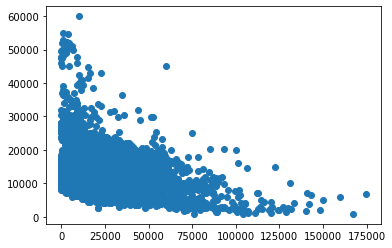

In [23]:
plt.scatter(Car_2["mileage"], Car_2["price"])

In [24]:
KM = KMeans(n_clusters = 3)
KM

KMeans(n_clusters=3)

In [25]:
Predict_1 = KM.fit_predict(Car_2[["mileage", "price"]])
Predict_1

array([2, 0, 2, ..., 2, 1, 2])

In [26]:
Car_2["Target_1"] = Predict_1
Car_2

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Target_1
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0,2
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0,0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0,2
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0,0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0,2
...,...,...,...,...,...,...,...,...,...,...
6733,IQ,2011,5500,Automatic,30000,Petrol,20,58.9,1.0,2
6734,Urban Cruiser,2011,4985,Manual,36154,Petrol,125,50.4,1.3,2
6735,Urban Cruiser,2012,4995,Manual,46000,Diesel,125,57.6,1.4,2
6736,Urban Cruiser,2011,3995,Manual,60700,Petrol,125,50.4,1.3,1


No handles with labels found to put in legend.


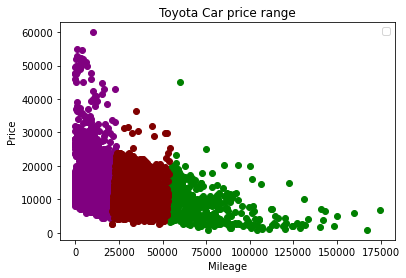

In [27]:
C_0 = Car_2[Car_2.Target_1 == 0]
C_1 = Car_2[Car_2.Target_1 == 1]
C_2 = Car_2[Car_2.Target_1 == 2]
#C_3 = Car_2[Car_2.Target_1 == 3]

plt.scatter(C_0["mileage"], C_0["price"], color = "purple", label = "")
plt.scatter(C_1["mileage"], C_1["price"], color = "green", label = "")
plt.scatter(C_2["mileage"], C_2["price"], color = "maroon", label = "")
#plt.scatter(C_3["mileage"], C_3["price"], color = "red", label = "")

plt.xlabel("Mileage")
plt.ylabel("Price")
plt.title("Toyota Car price range")

plt.legend()

In [28]:
S = MinMaxScaler()
S.fit(Car_2[["mileage"]])
Car_2[["mileage"]] = S.fit_transform(Car_2[["mileage"]])

S.fit(Car_2[["price"]])
Car_2[["price"]] = S.fit_transform(Car_2[["price"]])

Car_2.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Target_1
0,GT86,2016,0.256150,Manual,0.138100,Petrol,265,36.2,2.0,2
1,GT86,2017,0.256066,Manual,0.106716,Petrol,145,36.2,2.0,0
2,GT86,2015,0.222301,Manual,0.157479,Petrol,265,36.2,2.0,2
3,GT86,2017,0.306839,Manual,0.084476,Petrol,150,36.2,2.0,0
4,GT86,2017,0.281478,Manual,0.208019,Petrol,145,36.2,2.0,2


In [29]:
km = KMeans(n_clusters = 3)
km

KMeans(n_clusters=3)

In [30]:
predic_2 = km.fit_predict(Car_2[["mileage", "price"]])
predic_2

array([2, 2, 2, ..., 0, 0, 0])

In [31]:
Car_2["Target_2"] = predic_2
Car_2

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Target_1,Target_2
0,GT86,2016,0.256150,Manual,0.138100,Petrol,265,36.2,2.0,2,2
1,GT86,2017,0.256066,Manual,0.106716,Petrol,145,36.2,2.0,0,2
2,GT86,2015,0.222301,Manual,0.157479,Petrol,265,36.2,2.0,2,2
3,GT86,2017,0.306839,Manual,0.084476,Petrol,150,36.2,2.0,0,1
4,GT86,2017,0.281478,Manual,0.208019,Petrol,145,36.2,2.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
6733,IQ,2011,0.078620,Automatic,0.171990,Petrol,20,58.9,1.0,2,2
6734,Urban Cruiser,2011,0.069913,Manual,0.207273,Petrol,125,50.4,1.3,2,0
6735,Urban Cruiser,2012,0.070082,Manual,0.263724,Diesel,125,57.6,1.4,2,0
6736,Urban Cruiser,2011,0.053174,Manual,0.348005,Petrol,125,50.4,1.3,1,0


In [32]:
Car_2.drop(["Target_1"], axis = 1, inplace = True)
Car_2

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Target_2
0,GT86,2016,0.256150,Manual,0.138100,Petrol,265,36.2,2.0,2
1,GT86,2017,0.256066,Manual,0.106716,Petrol,145,36.2,2.0,2
2,GT86,2015,0.222301,Manual,0.157479,Petrol,265,36.2,2.0,2
3,GT86,2017,0.306839,Manual,0.084476,Petrol,150,36.2,2.0,1
4,GT86,2017,0.281478,Manual,0.208019,Petrol,145,36.2,2.0,1
...,...,...,...,...,...,...,...,...,...,...
6733,IQ,2011,0.078620,Automatic,0.171990,Petrol,20,58.9,1.0,2
6734,Urban Cruiser,2011,0.069913,Manual,0.207273,Petrol,125,50.4,1.3,0
6735,Urban Cruiser,2012,0.070082,Manual,0.263724,Diesel,125,57.6,1.4,0
6736,Urban Cruiser,2011,0.053174,Manual,0.348005,Petrol,125,50.4,1.3,0


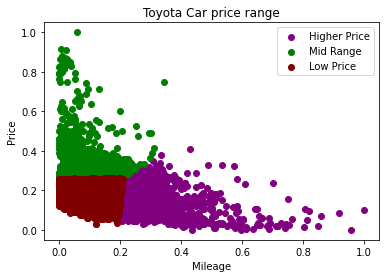

In [33]:
P_0 = Car_2[Car_2.Target_2 == 0]
P_1 = Car_2[Car_2.Target_2 == 1]
P_2 = Car_2[Car_2.Target_2 == 2]
#P_3 = Car_2[Car_2.Target_2 == 3]

plt.scatter(P_0["mileage"], P_0["price"], color = "purple", label = "Higher Price")
plt.scatter(P_1["mileage"], P_1["price"], color = "green", label = "Mid Range")
plt.scatter(P_2["mileage"], P_2["price"], color = "maroon", label = "Low Price")
#plt.scatter(P_3["mileage"], P_3["price"], color = "red", label = "")

plt.xlabel("Mileage")
plt.ylabel("Price")
plt.title("Toyota Car price range")

plt.legend()

In [35]:
Car

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,6,2016,16000,1,24089,3,265,36.2,2.0
1,6,2017,15995,1,18615,3,145,36.2,2.0
2,6,2015,13998,1,27469,3,265,36.2,2.0
3,6,2017,18998,1,14736,3,150,36.2,2.0
4,6,2017,17498,1,36284,3,145,36.2,2.0
...,...,...,...,...,...,...,...,...,...
6733,8,2011,5500,0,30000,3,20,58.9,1.0
6734,14,2011,4985,1,36154,3,125,50.4,1.3
6735,14,2012,4995,1,46000,0,125,57.6,1.4
6736,14,2011,3995,1,60700,3,125,50.4,1.3


In [40]:
Car["engineSize"] = Car["engineSize"].astype(int)
Car["mpg"] = Car["mpg"].astype(int)

In [41]:
Car

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,6,2016,16000,1,24089,3,265,36,2
1,6,2017,15995,1,18615,3,145,36,2
2,6,2015,13998,1,27469,3,265,36,2
3,6,2017,18998,1,14736,3,150,36,2
4,6,2017,17498,1,36284,3,145,36,2
...,...,...,...,...,...,...,...,...,...
6733,8,2011,5500,0,30000,3,20,58,1
6734,14,2011,4985,1,36154,3,125,50,1
6735,14,2012,4995,1,46000,0,125,57,1
6736,14,2011,3995,1,60700,3,125,50,1


In [42]:
Car.to_csv('new_car.csv')